In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [2]:
data = pd.read_csv('clustering_data_2000.csv')
data.head()

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
3,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
4,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412


In [3]:
data.isna().sum()

country              0
renewable            1
oil                  1
gas                  1
nuclear              1
hydroelec            1
coal                 1
co2_emission         1
renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [4]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
print(data[data["renewable"].isnull()][null_columns])

    renewable  oil  gas  nuclear  hydroelec  coal  co2_emission  \
49        NaN  NaN  NaN      NaN        NaN   NaN           NaN   

    renewable_percent  oil_percent  gas_percent  nuclear_percent  \
49                NaN          NaN          NaN              NaN   

    hydroelec_percent  coal_percent  co2_percent  
49                NaN           NaN          NaN  


In [5]:
data.loc[[49]]

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
49,USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.drop([49])

In [7]:
selected_data = data.iloc[:, 8:]
selected_data

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
3,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
4,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
...,...,...,...,...,...,...,...
77,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094
78,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
79,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
80,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [8]:
selected_data.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568
std,4.078217,3.158859,3.591824,4.340073,2.787846,4.501931,3.433796
min,0.000000,0.023973,0.000000,0.000000,0.000000,0.000000,0.012844
25%,0.000000,0.195655,0.098270,0.000000,0.032038,0.006226,0.150094
50%,0.094895,0.370354,0.384415,0.000000,0.271634,0.122124,0.293999
75%,0.646656,1.051843,1.062587,0.531415,1.045174,0.565523,1.088724
max,33.626782,26.608555,31.503089,32.414766,15.259953,31.898156,26.512908


In [9]:
desired_values = selected_data[(selected_data['renewable_percent'] < 4) & (selected_data['oil_percent']<4) & (selected_data['gas_percent'] < 4)&(selected_data['nuclear_percent'] < 4)&
             (selected_data['hydroelec_percent'] < 4)& (selected_data['coal_percent'] < 4)& (selected_data['co2_percent'] < 4)]

In [10]:
desired_values.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.395218,0.543123,0.647906,0.263933,0.477423,0.313803,0.480830
std,0.749395,0.617233,0.839170,0.639454,0.668657,0.622535,0.501543
min,0.000000,0.023973,0.000000,0.000000,0.000000,0.000000,0.012844
25%,0.000000,0.132774,0.077405,0.000000,0.014513,0.004956,0.124229
50%,0.027113,0.330104,0.339270,0.000000,0.195047,0.091621,0.266651
75%,0.358935,0.652739,0.887173,0.160087,0.639765,0.284329,0.576261
max,3.356846,2.786295,3.719797,3.159123,3.361329,3.371712,1.989515


In [11]:
desired_values.reset_index()

,index,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,1,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
1,3,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
2,5,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262
3,6,0.192824,0.330104,0.287553,0.000000,1.318103,0.122124,0.253643
4,7,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000,0.093592
...,...,...,...,...,...,...,...,...
64,76,0.094895,1.063108,0.083092,0.000000,0.000000,0.000000,0.494608
65,78,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
66,79,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
67,80,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [12]:
 

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(desired_values)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


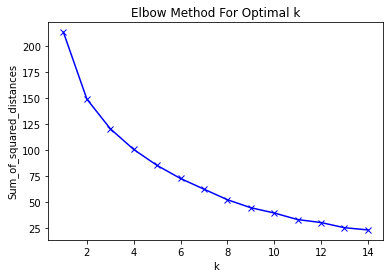

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
# Use n_clusters=5 as the k value

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=600, algorithm = 'auto')

In [15]:
# Fit the model to the data
model = kmeans.fit(desired_values)

centroids = model.cluster_centers_
print(centroids)


[[0.20401017 0.25059905 0.24981191 0.09615475 0.33426182 0.11673659
  0.20342365]
 [0.32025424 1.05086249 1.69831183 0.03436639 0.62264392 0.21615525
  0.84899635]
 [2.55090485 0.95495136 0.37508741 1.93657574 1.75019751 0.42944533
  0.65697857]
 [0.22159432 0.83966418 1.08429341 1.20505067 0.25641045 1.92314504
  1.33953193]
 [2.5301366  2.71737122 2.60169551 0.1679003  1.65266678 0.43073993
  1.81185005]]


In [16]:
# Predict the clusters
predicted_clusters = kmeans.predict(desired_values)

In [17]:
predicted_clusters

array([4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 4, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 3, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0,
       3, 1, 0])

In [18]:
len(predicted_clusters)

69

In [19]:
labels = pd.DataFrame(model.labels_)

labeleddata = pd.concat((desired_values,labels),axis=1, join='inner')

labeleddata = labeleddata.rename({0:'labels'},axis=1)

labeleddata



,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
1,2.472937,2.648448,1.800441,0.335801,1.414735,2.959570e-01,1.634185,1
3,0.274927,0.604352,1.619131,0.252310,1.455761,2.918375e-02,0.576261,0
5,0.532573,0.355576,0.351635,0.000000,0.816165,1.451436e-01,0.260262,0
6,0.192824,0.330104,0.287553,0.000000,1.318103,1.221238e-01,0.253643,0
7,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000e+00,0.093592,1
8,0.061507,0.224197,0.016671,0.000000,0.691912,2.845049e-02,0.120290,0
9,0.007796,0.051552,0.491957,0.000000,0.000000,0.000000e+00,0.060974,0
10,0.000000,0.712645,1.553903,0.000000,2.689868,5.969470e-03,0.619641,0
11,1.154467,0.398186,0.000000,0.000000,0.657238,1.174106e-02,0.197362,3
12,0.000000,0.229316,0.761701,0.000000,0.001155,4.495170e-02,0.235532,0


In [20]:
len(labels)

69

In [21]:
labels

,0
0,4
1,1
2,0
3,0
4,0
...,...
64,0
65,0
66,3
67,1


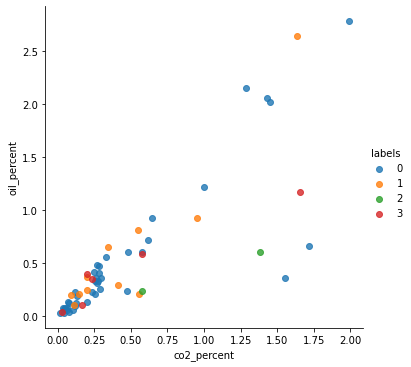

In [22]:
sns.lmplot(x='co2_percent',y='oil_percent',data=labeleddata,hue='labels',fit_reg=False)

In [23]:
labeleddata['Constant'] = "Data"
#This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.

<AxesSubplot:xlabel='Constant', ylabel='co2_percent'>

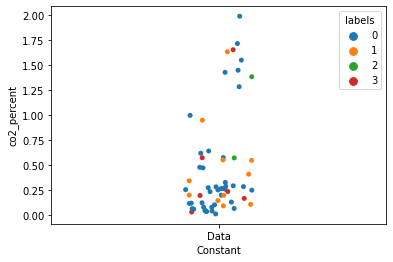

In [24]:
sns.stripplot(x=labeleddata['Constant'],y=labeleddata['co2_percent'],hue=labeleddata['labels'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='co2_percent'>

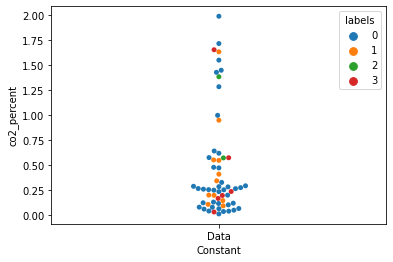

In [25]:
sns.swarmplot(x=labeleddata['Constant'],y=labeleddata['co2_percent'],hue=labeleddata['labels'])